###Extracción de los Componentes Principales




In [1]:
#Importar librerias
import numpy as np
import pandas as pd

In [2]:
#imports from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

In [3]:
#loading the dataset direclty from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vamos a usar la base de datos de Boston

In [4]:
Boston_filepath = "/content/drive/MyDrive/Boston.xlsx"
Boston = pd.read_excel(Boston_filepath)
Boston.head()




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#Visualización de las variables
bos = pd.DataFrame(Boston)


print(bos.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [6]:
y_price=Boston['medv']
print(y_price)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [7]:
x_total=Boston.drop(['medv'], axis=1)
print(x_total)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [8]:
# Precios como vector
y_price = np.array(y_price).reshape(-1,1)

print(x_total.shape)
print(y_price.shape)
columns_names = x_total.columns.values
columns_names

(506, 13)
(506, 1)


array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'], dtype=object)

Empleamos el código para visualizar la misma cantidad de Componentes Principales que los predictores y determinar el porcentaje de varianza explicada

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]
------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.47129606 0.581548   0.67713389 0.74310121 0.80731782 0.8578876
 0.89906884 0.92953786 0.9508412  0.96778257 0.98209137 0.99511467
 1.        ]


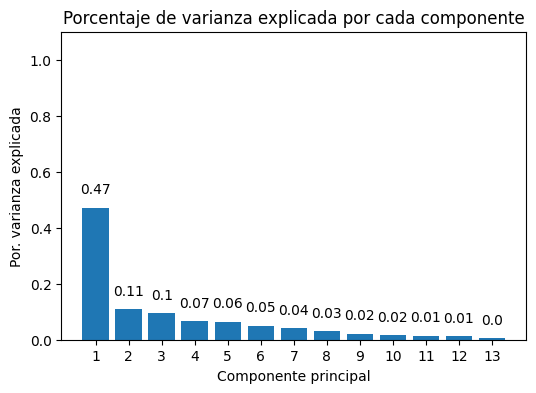

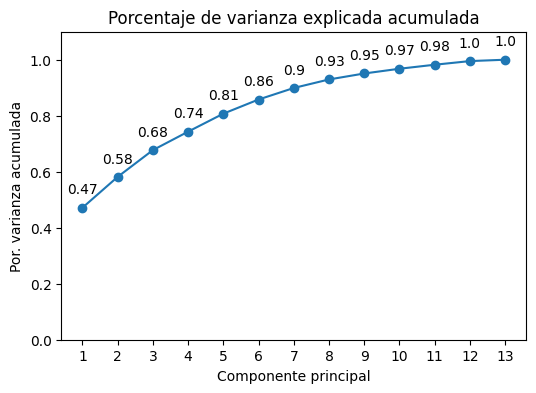

In [9]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(x_total)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(x_total)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

#pd.DataFrame(
   # data    = modelo_pca.components_,
   # columns = x_total.columns.values,
   # index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12', 'PC13']
#)

# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(x_total.columns.values)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(x_total.columns.values)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(x_total.columns.values)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');



El código anterior está integrado para visualizar todas las componentes. Por lo tanto, una vez se sabe cuantas componentes se van a seleccionar (en general, una cantidad mucho menor que la cantidad de predictores) siempre y cuando la varianza explicada sea *amplia*, vamos a emplear el código específico para extraer la cantidad seleccionada de componentes. Para el ejemplo, vamos a extraer las 3 primeras componentes.  

Observar que se está utilizando la base de predictores completa.

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_total = sc.fit_transform(x_total)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
Componentes_principales = pca.fit_transform(X_total)


La variable nombrada *Componentes_principales*, corresponde con el array de las tres primeras componentes principales

In [20]:
Componentes_principales

array([[-2.09829747,  0.77311275,  0.34294273, -0.89177403],
       [-1.45725167,  0.59198521, -0.69519931, -0.48745853],
       [-2.07459756,  0.5996394 ,  0.1671216 , -0.73920419],
       ...,
       [-0.31236047,  1.15524644, -0.40859759, -0.78630409],
       [-0.27051907,  1.04136158, -0.58545406, -0.67813391],
       [-0.12580322,  0.76197805, -1.294882  , -0.2883292 ]])

Verificamos que la varianza explicada de las tres componentes principales es la que ya se habia determinado con el código anterior

In [21]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732])

Aplicamos la regresión lineal sobre los 4 primeros componentes principales

In [22]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(Componentes_principales, y_price, test_size = 0.2, random_state=5)


In [23]:
regresion_PCA=LinearRegression()
regresion_PCA.fit(X_train_pca, Y_train_pca)
y_train_predict_pca = regresion_PCA.predict(X_train_pca)
mse_t_train_pca = mean_squared_error(Y_train_pca, y_train_predict_pca)
print('MSE_t_train is {}'.format(mse_t_train_pca))
r2_t_train_pca = round(r2_score(Y_train_pca, y_train_predict_pca),2)
print('R2_t_train score is {}'.format(r2_t_train_pca))

MSE_t_train is 31.787671037282745
R2_t_train score is 0.63


Comparamos con la regresión lineal sobre todos los predictores

In [24]:
X_train_t, X_test_t, Y_train_t, Y_test_t = train_test_split(x_total, y_price, test_size = 0.2, random_state=5)

In [25]:
#Regresión lineal datos train
reg_t = LinearRegression()
reg_t.fit(X_train_t, Y_train_t)

#obtención de las métricas de desempeño
y_train_predict_t = reg_t.predict(X_train_t)
mse_t_train = mean_squared_error(Y_train_t, y_train_predict_t)
print('MSE_t_train is {}'.format(mse_t_train))
r2_t_train = round(r2_score(Y_train_t, y_train_predict_t),2)
print('R2_t_train score is {}'.format(r2_t_train))

MSE_t_train is 22.477090408387628
R2_t_train score is 0.74
